In [5]:
import os
os.getcwd()

'/Users/sally/Documents/GitHub/DSC180Q2/notebooks'

In [41]:
import os
import shutil
import bagpy
import rosbag
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import math
import numpy as np


print('Output directory created successfully')

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'semi_circle_0.7.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_0_7 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'semi_circle_0_5.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_0_5 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'semi_circle_0_9.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_0_9 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'semi_circle_0_8.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_0_8 = pd.read_csv(odom_data)

print('Extracted .bag data and written to destination successfully')

Output directory created successfully
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/semi_circle_0.7 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/semi_circle_0_5 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/semi_circle_0_9 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/semi_circle_0_8 already exists. Not creating.
Extracted .bag data and written to destination successfully


In [23]:
a = df_odom_0_7[['Time','pose.pose.position.x','pose.pose.position.y']]
a['Time'] = a['Time'] - a['Time'].min()

/Users/sally/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
a

,Time,pose.pose.position.x,pose.pose.position.y
0,0.000000,0.000000,0.000000
1,0.000033,0.000000,0.000000
2,0.000056,0.000000,0.000000
3,0.008502,0.000000,0.000000
4,0.028008,0.000000,0.000000
...,...,...,...
606,12.079000,-0.203091,0.487572
607,12.126796,-0.202658,0.489257
608,12.126826,-0.202279,0.490736
609,12.166120,-0.201933,0.492086


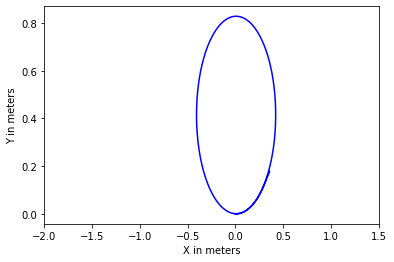

odom plot success!


In [59]:
# df_odom['pos_x'] = pos_x
# df_odom['pos_y'] = pos_y
plt.plot(df_odom_0_7['pose.pose.position.x'], df_odom_0_7['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.xticks(np.arange(-2, 2 ,0.5))
plt.show()
print('odom plot success!')

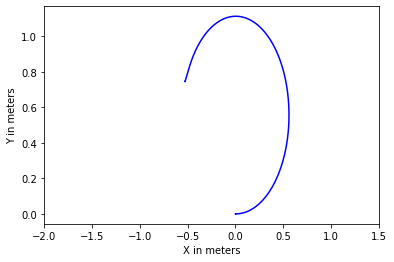

odom plot success!


In [60]:
plt.plot(df_odom_0_9['pose.pose.position.x'], df_odom_0_9['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.xticks(np.arange(-2, 2 ,0.5))
plt.show()
print('odom plot success!')

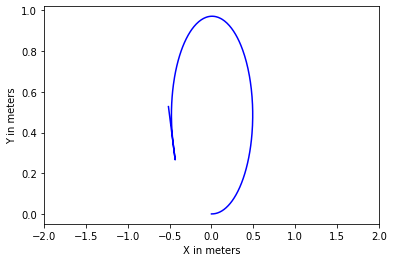

odom plot success!


In [61]:
plt.plot(df_odom_0_8['pose.pose.position.x'], df_odom_0_8['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

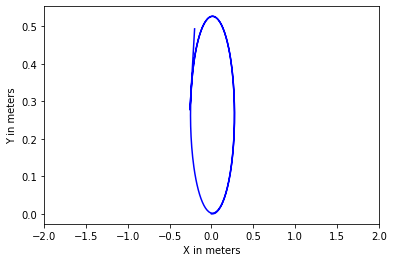

odom plot success!


In [62]:
plt.plot(df_odom_0_5['pose.pose.position.x'], df_odom_0_5['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

In [32]:
odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_3412.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_3412 = pd.read_csv(odom_data)
#df_odom.to_csv(os.path.join(outdir,'odom_data_test.csv'))

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_3912.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_3912 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_4112.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_4112 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_3912.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_3912 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_4612.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_4612 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_5112.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_5112 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'straight_5612.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_5612 = pd.read_csv(odom_data)

print('Extracted .bag data and written to destination successfully')

[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_3412 already exists. Not creating.
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_3912.
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_4112.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_3912 already exists. Not creating.
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_4612.
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_5112.
[INFO]  Successfully created the data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/straight_5612.
Extracted .bag data and written to destination successfully


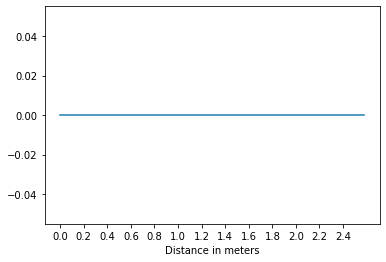

In [44]:
plt.figure()
plt.plot(df_odom_3412['pose.pose.position.x'], [0] * len(df_odom_3412))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

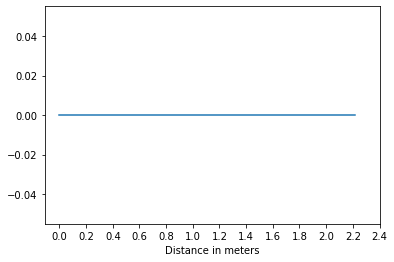

In [45]:
plt.figure()
plt.plot(df_odom_3912['pose.pose.position.x'], [0] * len(df_odom_3912))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

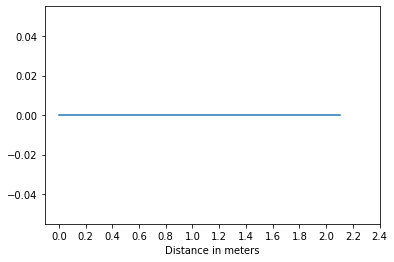

In [47]:
plt.figure()
plt.plot(df_odom_4112['pose.pose.position.x'], [0] * len(df_odom_4112))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

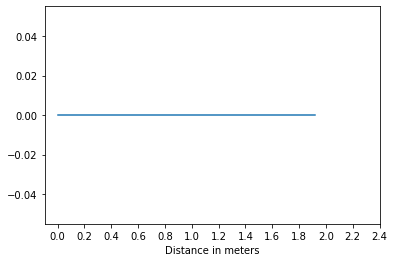

In [49]:
plt.figure()
plt.plot(df_odom_4612['pose.pose.position.x'], [0] * len(df_odom_4612))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

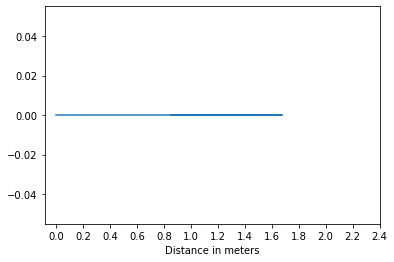

In [50]:
plt.figure()
plt.plot(df_odom_5112['pose.pose.position.x'], [0] * len(df_odom_5112))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

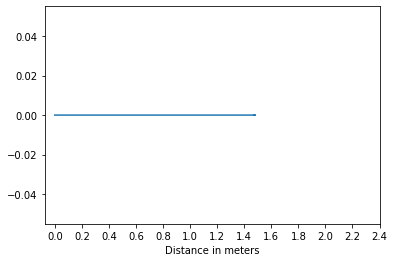

In [51]:
plt.figure()
plt.plot(df_odom_5612['pose.pose.position.x'], [0] * len(df_odom_5612))
plt.xlabel('Distance in meters')
plt.xticks(np.arange(0, 2.5 ,0.2))
plt.show()

In [66]:
odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m1_0.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_1_0 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m1_1.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_1_1 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m1_1v2.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_1_1v2 = pd.read_csv(odom_data)


odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m1_2.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_1_2 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m1_5.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_1_5 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m2_0.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_2_0 = pd.read_csv(odom_data)

odometry_path = os.path.join('/Users/sally/Documents/GitHub/DSC180Q2/data/raw', 'vesc_servo_gain_m10_0.bag')
bag = bagreader(odometry_path)
odom_data = bag.message_by_topic('/vesc/odom')
df_odom_10_0 = pd.read_csv(odom_data)


print('Extracted .bag data and written to destination successfully')

[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m1_0 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m1_1 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m1_1v2 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m1_2 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m1_5 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m2_0 already exists. Not creating.
[INFO]  Data folder /Users/sally/Documents/GitHub/DSC180Q2/data/raw/vesc_servo_gain_m10_0 already exists. Not creating.
Extracted .bag data and written to destination successfully


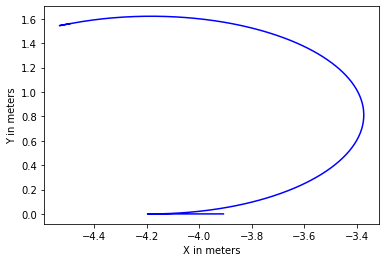

odom plot success!


In [68]:
plt.plot(df_odom_1_0['pose.pose.position.x'], df_odom_1_0['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

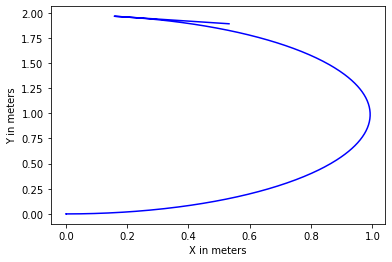

odom plot success!


In [69]:
plt.plot(df_odom_1_2['pose.pose.position.x'], df_odom_1_2['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

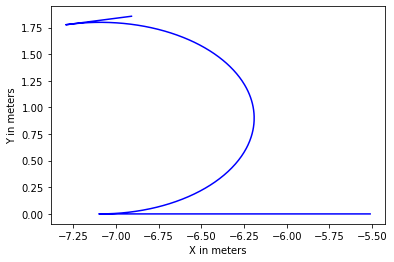

odom plot success!


In [70]:
plt.plot(df_odom_1_1v2['pose.pose.position.x'], df_odom_1_1v2['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

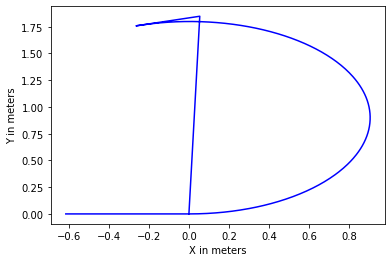

odom plot success!


In [72]:
plt.plot(df_odom_1_1['pose.pose.position.x'], df_odom_1_1['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

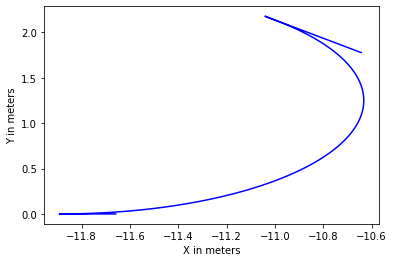

odom plot success!


In [73]:
plt.plot(df_odom_1_5['pose.pose.position.x'], df_odom_1_5['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

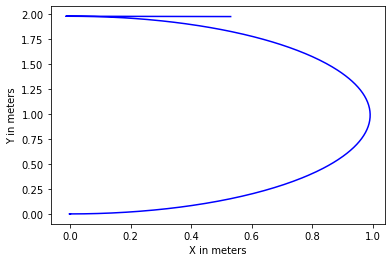

odom plot success!


In [74]:
plt.plot(df_odom_2_0['pose.pose.position.x'], df_odom_2_0['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')

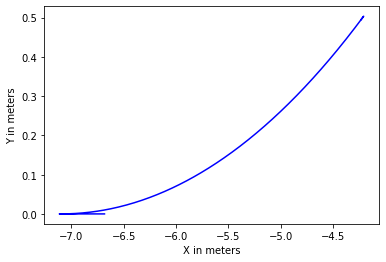

odom plot success!


In [75]:
plt.plot(df_odom_10_0['pose.pose.position.x'], df_odom_10_0['pose.pose.position.y'],'b')
plt.xlabel('X in meters')
plt.ylabel('Y in meters')
#plt.xticks(np.arange(-2, 2.5 ,0.5))
plt.show()
print('odom plot success!')